In [4]:
import numpy as np
import pandas as pd

In [6]:
dataset = pd.read_csv('../csvki/Toxins5.csv')
dataset.shape

(137, 5)

In [7]:
dataset.describe()

,TN,Chlorophyla,TDI,TTC
count,137.000000,137.000000,137.000000,137.000000
mean,0.941022,39.032774,0.780657,1.351095
std,0.800613,72.623651,0.394969,2.849098
min,0.070000,0.480000,0.000000,0.000000
25%,0.410000,5.330000,0.530000,0.030000
50%,0.730000,16.440000,0.880000,0.190000
75%,1.160000,50.480000,1.060000,0.900000
max,4.570000,690.160000,1.440000,17.190000


In [8]:
dataset.head(5)

,TN,Chlorophyla,TDI,TTC,Toxicity
0,0.57,0.62,0.42,0.00,low
1,0.18,5.91,1.05,0.01,low
2,0.21,5.33,0.39,0.02,low
3,1.07,6.71,1.00,0.67,middle
4,0.36,2.59,1.07,0.18,middle


In [20]:
dataset.groupby('Toxicity').size()
print(dataset.columns)

Index(['TN ', 'Chlorophyla ', 'TDI', 'TTC', 'Toxicity'], dtype='object')


In [21]:
feature_columns = ['TN ', 'Chlorophyla ', 'TDI', 'TTC']
X = dataset[feature_columns].values
y = dataset['Toxicity'].values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

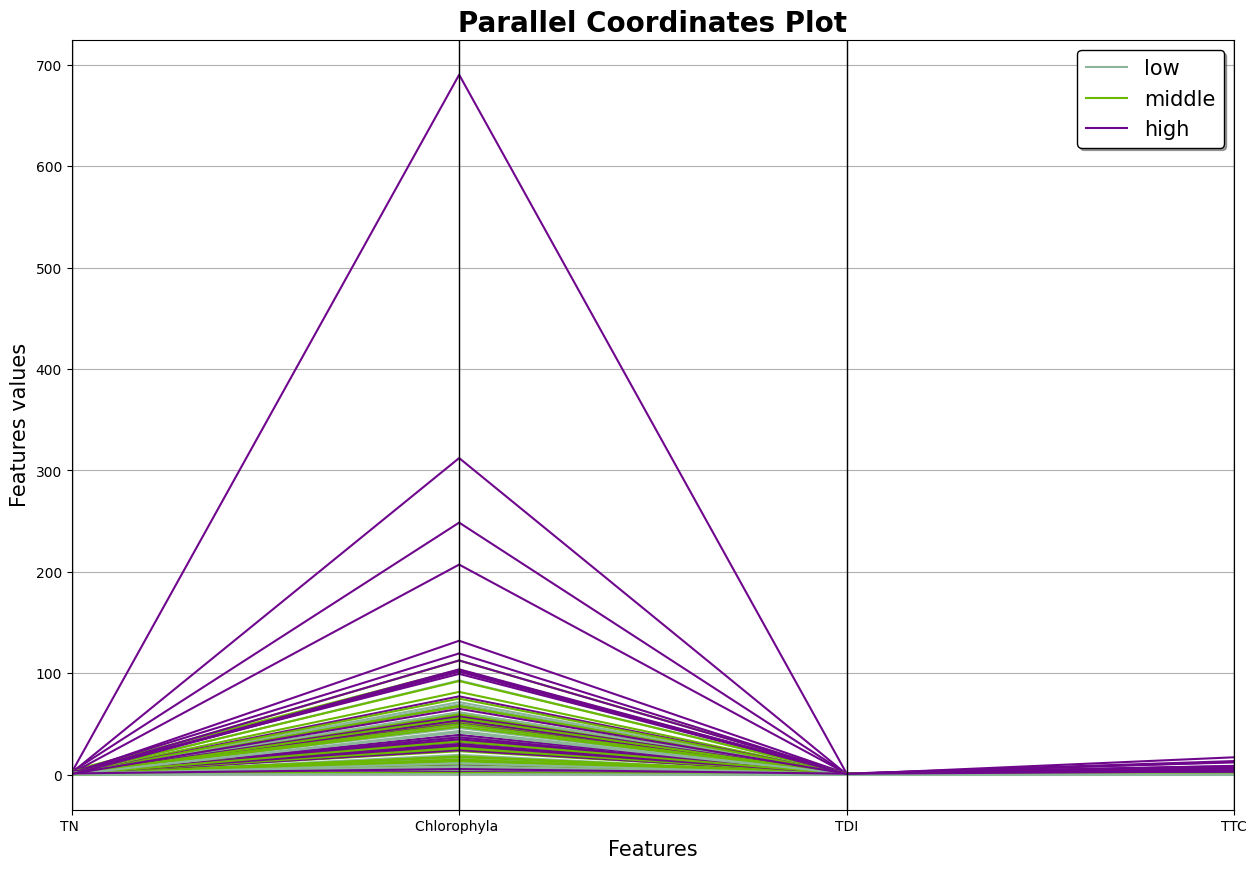

In [29]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "Toxicity")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

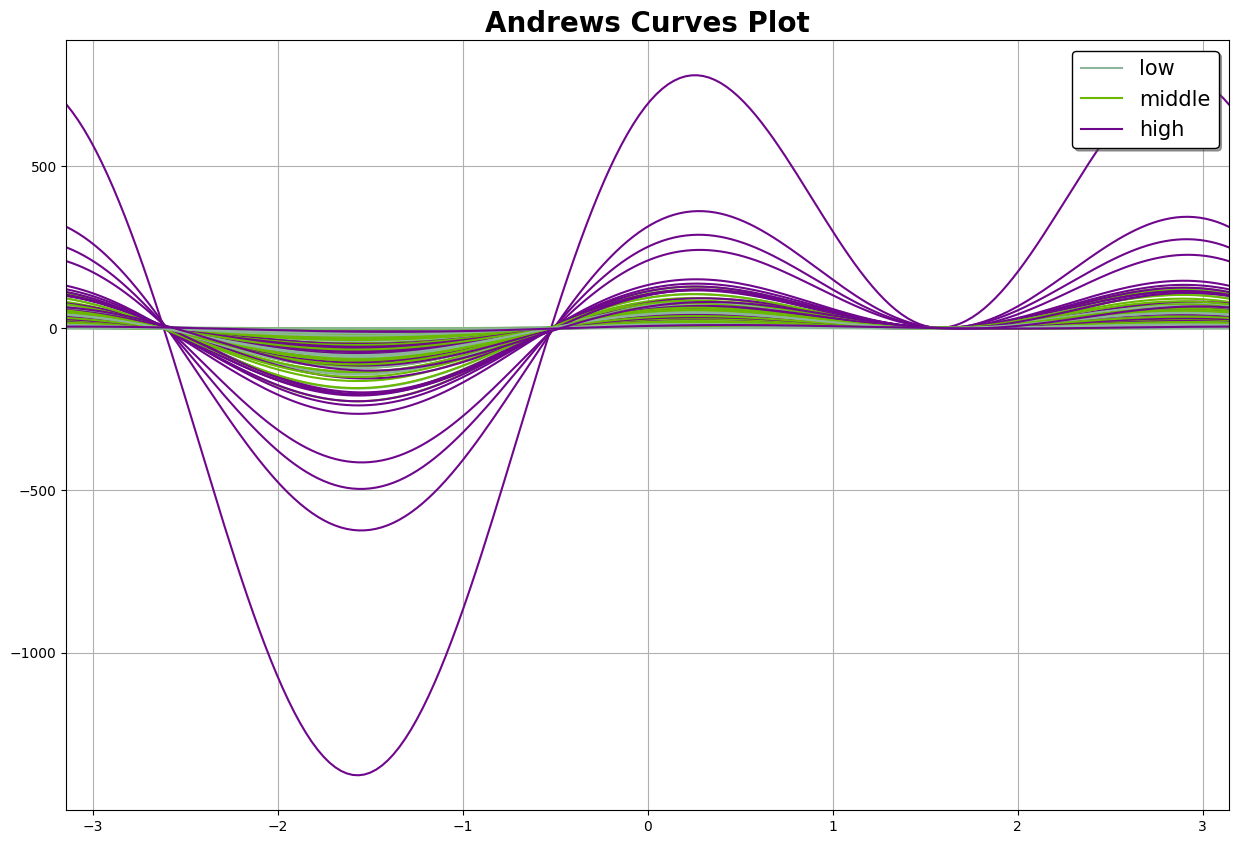

In [31]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "Toxicity")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

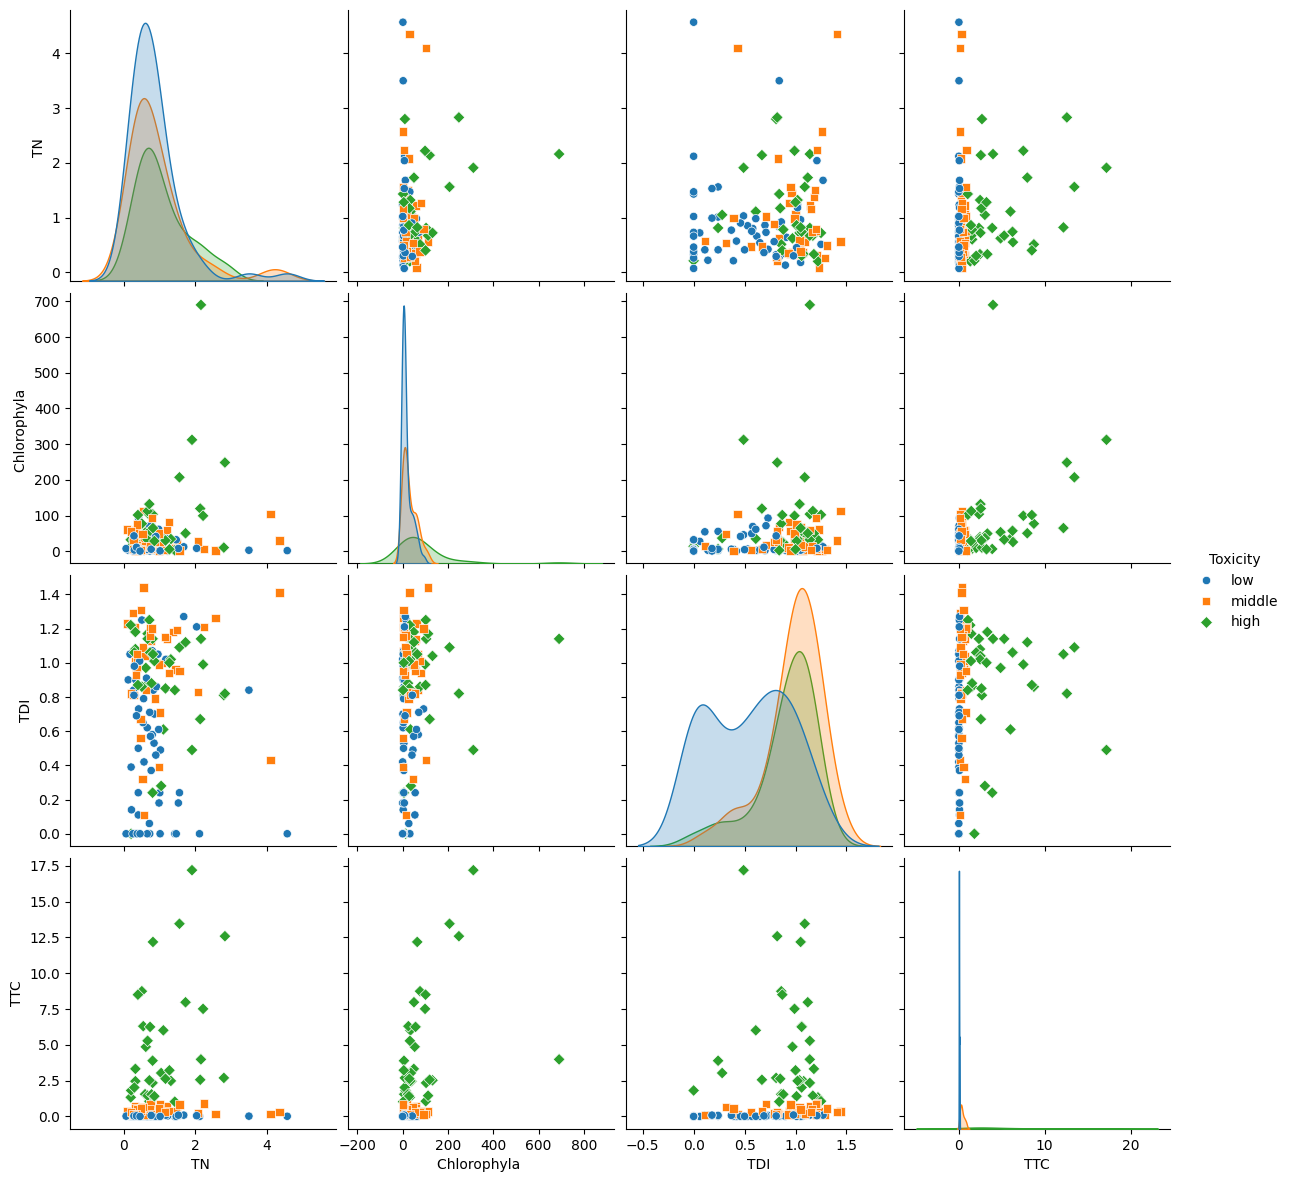

In [32]:
plt.figure()
sns.pairplot(dataset, hue = "Toxicity", height=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

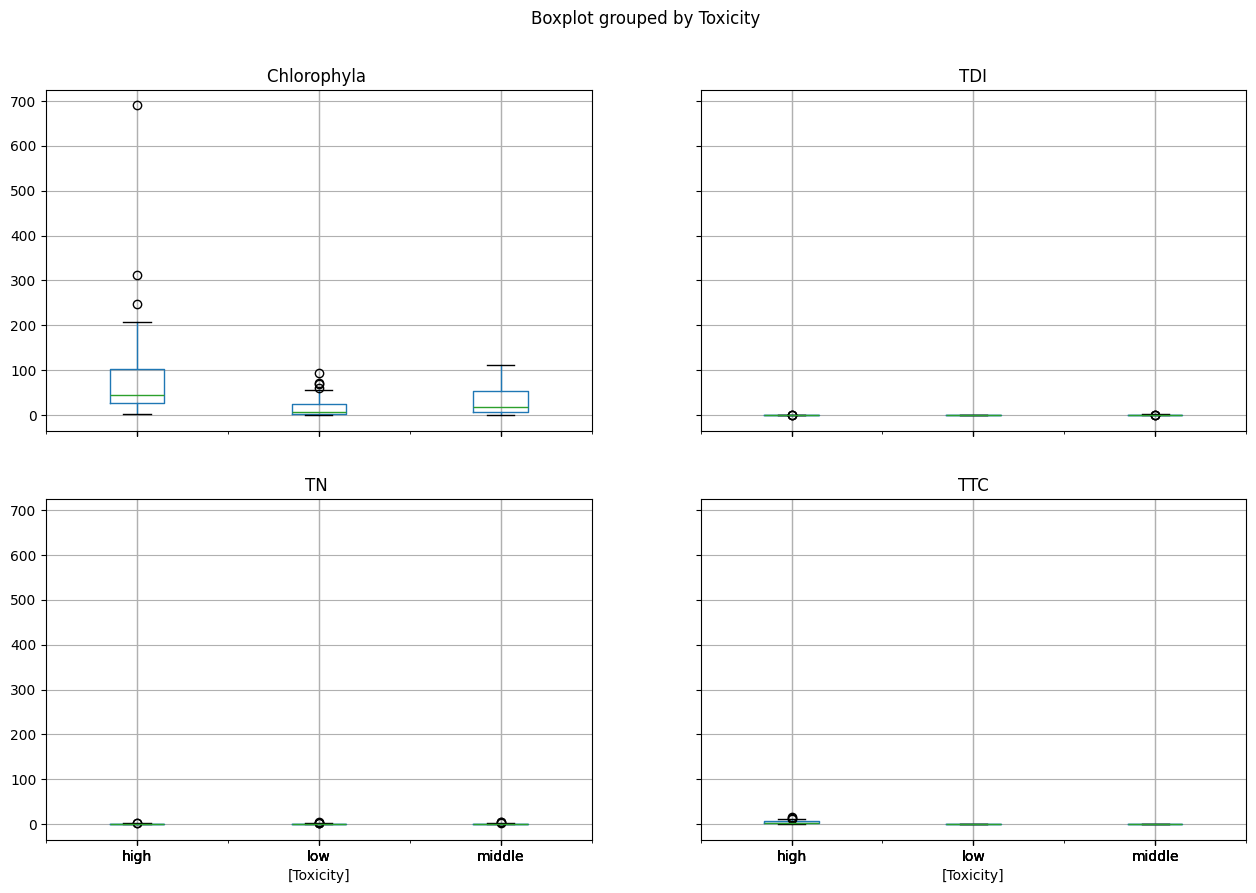

In [33]:
plt.figure()
dataset.boxplot(by="Toxicity", figsize=(15,10))
plt.show()

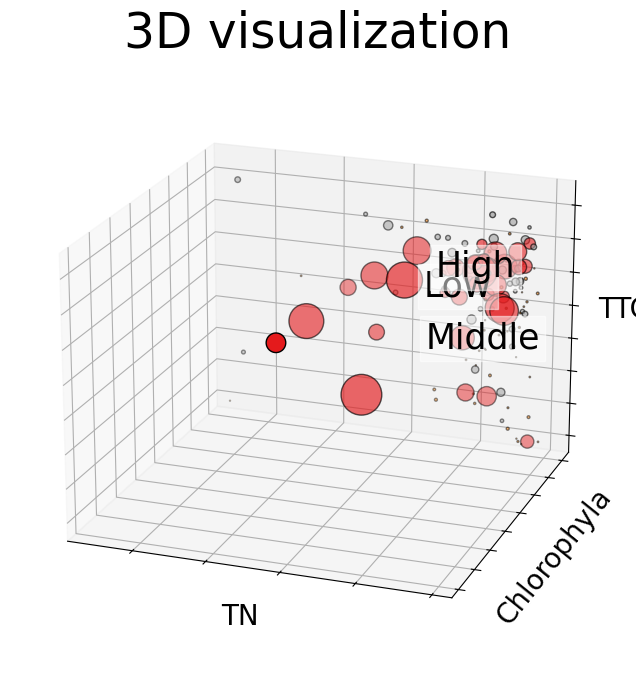

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)
for name, label in [('Low', 0), ('Middle', 1), ('High', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean(),
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=25)
    
ax.set_title("3D visualization", fontsize=35)
ax.set_xlabel("TN", fontsize=20)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Chlorophyla", fontsize=20)
ax.yaxis.set_ticklabels([])
ax.set_zlabel("TTC", fontsize=20)
ax.zaxis.set_ticklabels([])

plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 1, 1],
       [3, 8, 1],
       [2, 5, 3]], dtype=int64)

In [45]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 53.57 %.


In [46]:
k_list = list(range(1, 30, 2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

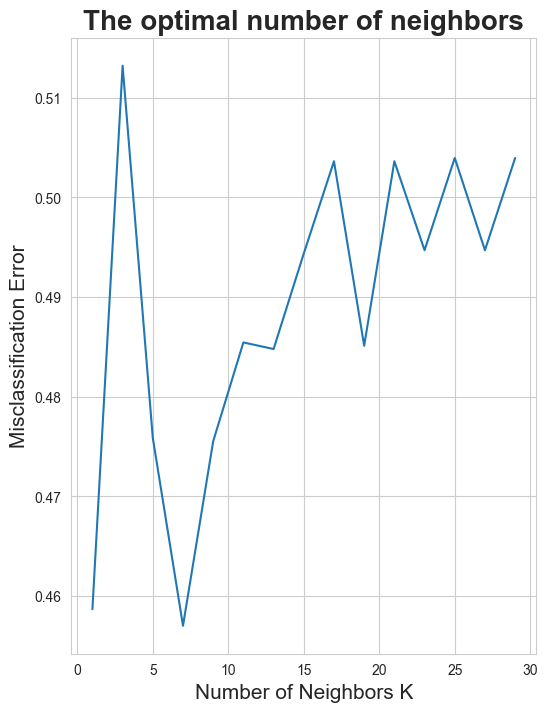

In [47]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(6,8))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [48]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.
